# LeetCode

295. Find Median from Data Stream

https://leetcode.com/problems/find-median-from-data-stream/

**Description**

    The median is the middle value in an ordered integer list. If the size of the list is even, there is no middle value, and the median is the mean of the two middle values.

    For example, for arr = [2,3,4], the median is 3.
    For example, for arr = [2,3], the median is (2 + 3) / 2 = 2.5.
    Implement the MedianFinder class:

    MedianFinder() initializes the MedianFinder object.
    void addNum(int num) adds the integer num from the data stream to the data structure.
    double findMedian() returns the median of all elements so far. Answers within 10-5 of the actual answer will be accepted.

**Example**

    Example 1:

    Input
    ["MedianFinder", "addNum", "addNum", "findMedian", "addNum", "findMedian"]
    [[], [1], [2], [], [3], []]
    Output
    [null, null, null, 1.5, null, 2.0]

    Explanation
    MedianFinder medianFinder = new MedianFinder();
    medianFinder.addNum(1);    // arr = [1]
    medianFinder.addNum(2);    // arr = [1, 2]
    medianFinder.findMedian(); // return 1.5 (i.e., (1 + 2) / 2)
    medianFinder.addNum(3);    // arr[1, 2, 3]
    medianFinder.findMedian(); // return 2.0
 

**Constraints**

    -10^5 <= num <= 10^5
    There will be at least one element in the data structure before calling findMedian.
    At most 5 * 10^4 calls will be made to addNum and findMedian.


    Follow up:

    If all integer numbers from the stream are in the range [0, 100], how would you optimize your solution?
    If 99% of all integer numbers from the stream are in the range [0, 100], how would you optimize your solution?


In [10]:
import heapq

class MedianFinder:

    def __init__(self):
        self.small, self.large = [], []

    def addNum(self, num: int) -> None:
        if self.large and num > self.large[0]:
            heapq.heappush(self.large, num)
        else:
            heapq.heappush(self.small, -num)
            
        if len(self.large) > len(self.small)+1:
            val = heapq.heappop(self.large)
            heapq.heappush(self.small, -val)
        
        if len(self.small) > len(self.large)+1:
            val = heapq.heappop(self.small)
            heapq.heappush(self.large, -val)

    def findMedian(self) -> float:
        if len(self.large) > len(self.small):
            return self.large[0]
        elif len(self.small) > len(self.large):
            return -1 * self.small[0]
        else:
            return (-1 * self.small[0] + self.large[0]) / 2        
                              

In [11]:
medianFinder = MedianFinder()
medianFinder.addNum(1)
medianFinder.addNum(2)
print(medianFinder.findMedian())
medianFinder.addNum(3)
print(medianFinder.findMedian())

1.5
2


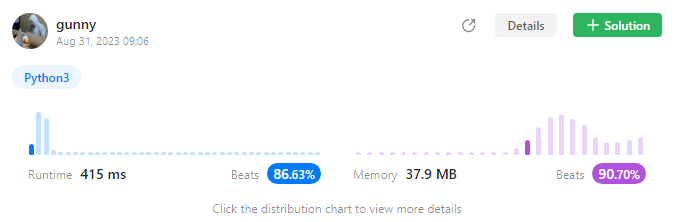